In [310]:
## Load Data
import numpy as np
x1 = np.array([4 , 4, 1, 2.5, 4.9, 1.9, 3.5, 0.5, 2, 4.5])
x2 = np.array ([2.9 , 4, 2.5 , 1, 4.5, 1.9, 4, 1.5, 2.1, 2.5])
y = np.array([1,1,-1,-1,1,-1,1,-1,-1,1])

### b. [15 pts] Make a random Lagrangian multiplier array, a where 0 ≤ ai ≤ 0.5. Calculate the bias parameter and the weight vectors w. Find the hyperplane equation. Calculate the margin and determine points in the margin using the obtained hyperplane equation. Find the support vectors if there are any. Using the visualization, justify if this is a good SVM classifier. Predict a class of a point x∗ = [3,3]. Is this point in a margin?

##### Make random Lagrangian array

In [311]:
L = []
N= len(y)

## Lagrangian multiplier array
for i in range(0,10):
    L.append(np.random.uniform(0, 0.5))

#put data into single matrix, python arrays
x = np.column_stack((x1, x2))
t = y.tolist()



##### Find w

In [312]:
# w = sum from i -> N : lagrangian mult.[i] * y[i] * data[i]
def find_w(lgrng, y, x, w):
    if lgrng == []:
        return w
    else: 
        w = w + lgrng[0]*y[0]*x[0]
        return find_w(lgrng[1:], y[1:], x[1:], w)
    
w1 = find_w(L, t, x1, 0) #using data ~ x1
w2 = find_w(L, t, x2, 0) # using data x2
w = [w1, w2]


print("weights: ", w)


weights:  [2.64061705405446, 2.054182669082519]


##### Find Bias

In [313]:
def find_b(N, y, x, w, b):
    if y == []:
        return b/N
    else:
        b = b + y[0] - np.dot(x[0], w)
        return find_b(N, y[1:], x[1:], w, b)
    
b = find_b(N, t, x, w, 0)

print("b: ", b)


b:  -13.13072849550882


##### Use the unit vector for implementation, find margin

In [314]:
mag = np.sqrt(w1**2 + w2**2 + b**2)
margin = 1 / mag
print("margin: ", margin)
w_old= w
b_old= b
w1 = w1 / mag
w2 = w2 / mag
w = [w1, w2]
print("w: ", w)
b = b / mag
print("b: ", b)

margin:  0.07379952096756143
w:  [0.1948762736479924, 0.15159769695815667]
b:  -0.9690414729236595


##### Hyperplane equation from obtained w, b

In [315]:
print(f"Hyperplane eq: y = {w1}*x1 + {w2}*x2 + {b}\n\n")

Hyperplane eq: y = 0.1948762736479924*x1 + 0.15159769695815667*x2 + -0.9690414729236595




##### Find points within the margin (i.e: hyperplane (+/-) 1)

In [316]:
def calc_h(w, x, b):
    return np.dot(x, w) + b


distances = np.abs(calc_h(w, x, b)) / np.linalg.norm(w)

# Find points that lie within the margin
margin_indices = np.where(distances < margin)

# Get points in the margin
points_in_margin = x[margin_indices]

print("Points within the margin:")
print(points_in_margin)

Points within the margin:
[]


##### Find support vectors (there are none)

In [317]:
SVs = []
h_ = []
ct = 0
for i in range(0,10):
    h = calc_h(w, x[i], b)
    # print("y:", y[i])
    # print("h:",h)
    # print("y*h: ", y[ct]*h, "\n")
    if (y[ct]*h == 1):
        SVs.append(i)
    ct = ct + 1

print("support vectors: ", SVs)



support vectors:  []


##### Visualizations

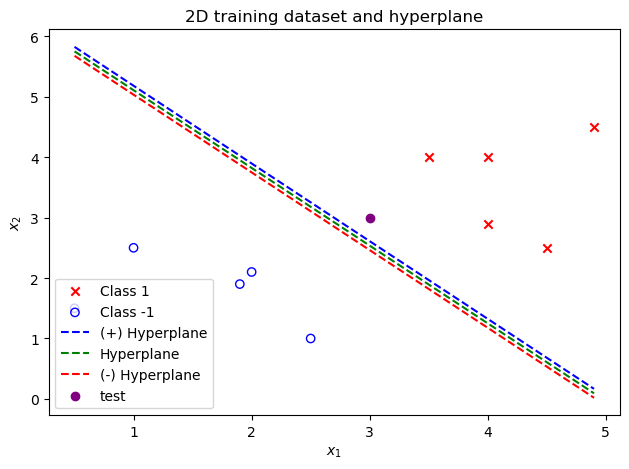

In [318]:
import matplotlib.pyplot as plt

def plot_data_2D(X, t, margin, w, b):
    class_1 = np.ravel(t == 1)
    class_0 = np.ravel(t == -1)

    plt.scatter(X[class_1, 0], X[class_1, 1], label='Class 1', marker='x', c='red')
    plt.scatter(X[class_0, 0], X[class_0, 1], label='Class -1', marker='o', edgecolors='blue', facecolors='none')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    # Define range of x1 values
    x1_range = np.linspace(min(x1), max(x1), 100)

# Calculate corresponding x2 values using the hyperplane equation: w1*x1 + w2*x2 + b = 0
    x2_values = (-w[0] * x1_range - b) / w[1] # fit hyperplane eq'n along x1 axis


    # Plot the hyperplane
    plt.plot(x1_range, x2_values + margin, color='blue', linestyle='--', label='(+) Hyperplane')
    plt.plot(x1_range, x2_values, color='green', linestyle='--', label='Hyperplane')
    plt.plot(x1_range, x2_values - margin, color='red', linestyle='--', label='(-) Hyperplane')
    # plt.plot([3],[3], color='blue', linestyle='--', label='test')
    plt.scatter(3, 3, label='test', marker='o', c='purple')

# margin1= 1/np.sqrt(w1**2 + w2**2 + b**2)

plot_data_2D(x, y, margin, w, b)
plt.title('2D training dataset and hyperplane')
plt.legend()
plt.tight_layout()
plt.show()

The points are easily linearly seperable, despite randomization in the Lagrangian multiplier. Unfortunately, our margins are not being maximized as we have no support vectors and our hyperplane occassionally (rarely) goes through the two classes (positive slope), not splitting the classes. In this way, sometimes we get severely incorrect classification.
<br><br>
The best case I viewed among the many however shows the test point quite close to the hyperplane and well inside the margin. This is a good case for the model, though we did not have these reliable outputs with random L. We can note that our margins are spread to the edge of the two classes ~ C1, C2. On the most typical case, all points are correctly classified with infrequent incorrect results coming from the randomized Lagrangian array.

##### Predicting x* = [3,3]

In [319]:
def d(w, b, x):
    return np.abs(w[0]*x[0] + w[1]*x[1] + b)/np.sqrt(w[0]**2 + w[1]**2)

class_pred_33 = d(w, b, [3,3])  #calc_h(w, [3,3], b)
print("distance [3,3] to hyperplane: ", class_pred_33, " < ", "margin: ", margin, "?" )
print("point is in margin? ", class_pred_33 < margin)

distance [3,3] to hyperplane:  0.2850587615755948  <  margin:  0.07379952096756143 ?
point is in margin?  False


This point is sometimes in the margin, as we can reliably see the test point laying above (outside of), and inside (within the [+] or [-] hyperplane) the marginal hyperplanes. We can see that the model would classify this point x* = [3,3] (correctly) with class 1 a large majority of the time. Sometimes this SVM may not produce accurate solutions, however. If anything, it should be expected in the positive marginal space, and shows that we may face generalization issues if our margins are not globally solved (optimized). It is necessary to solve the model using the SGD fashion (as from lecture notebook) to obtain this global solution. While the model upon solving the hyperplane initially is not always accurate, we can implement linear SVM entirely to solve the model and generalize with the most minimal classification error possible based on the data. <br><br>By looking at the hyperplane, we can see that we should expect SVM in the linear case to create a parametric model that will have the opportunity to face optimization. Upon the 'random, one-time' runs that we implement in this script, we can see that the model generally reveals the same hyperplane each time with some noise (if you will). We can see this as we usually see the rough same 'split' between the data with the hyperplane eq'n: <br> y = 0.2*x1 + 0.15*x2 -1. <br>We can see that if we get an expected (good) hyperplane, it roughly fits these values for w1, w2, and b. If the hyperplane eq'n is off or very off from these values, we should expect either not the best solution (maximal margins) or simply incorrect drawing of the hyperplane. However, we can further validate the efficacy of the model by visually seeing the performance of such 'one-time' runs. You will see in the case of the ideal hyperplane mentioned above, our margins follow the geometrical interpretation of Lagrangian/SVM. We will see in these 'ideal' runs that our margins are attempting maximization (often in the first run [without the SGD model]). <br><br> To keep it simple, our hyperplane line 'evens out' the split it takes for attaining its generalization capacity. In this way, it analyzes how to globally optimize the split for generalization and model classification. It does this by finding similar and minimized distances b/w the data points nearest to the hyperplane (decision boundary). Thus, if we were to create the SGD model and perform machine learning we should expect finding a global solution and that our model will be able to reach the global solution upon a quite reasonable number of iterations, as it performs well upon the very first iteration and without any of the more analytically rigorous model implementation that would give the global sol'n. 

###  c. [15 pts] Numerically verify that Karush-Kuhn-Tucker (KKT) conditions are satisfied for data points above using the objective equation below
## L = (λ/2)*w^2 − {i=1->N} ai [ yi(wxi +b)−1 ].
### Use the same a from Question a.

In [320]:
# y: {-1, 1}
def gx_gte_zero(y,w,x,b):
    h_x = np.dot(w, x) + b
    return y * h_x - 1

# g >= 0
gxes = []
for i in range(0,10): #NOTE: use 'old'(not from weight vector) values for b and w for KKT..
    gx = gx_gte_zero(y[i], w_old, x[i], b_old)
    gxes.append(gx)
    print(f"gx({i}): ", gx, " >= ", 0, " ? -> ", gx>=0)
print('\n')




gx(0):  2.3888694610483263  >=  0  ? ->  True
gx(1):  4.648470397039098  >=  0  ? ->  True
gx(2):  4.354654768748063  >=  0  ? ->  True
gx(3):  3.475003191290151  >=  0  ? ->  True
gx(4):  8.052117080229372  >=  0  ? ->  True
gx(5):  3.21060902154856  >=  0  ? ->  True
gx(6):  3.3281618700118685  >=  0  ? ->  True
gx(7):  7.7291459648578105  >=  0  ? ->  True
gx(8):  2.5357107823266105  >=  0  ? ->  True
gx(9):  2.887504920442545  >=  0  ? ->  True




In [321]:
# a >= 0
for i in range(0,10): 
    print(f"L({i}): {L[i]} >= 0 ? -> {L[i]>=0}")
print('\n')

L(0): 0.40541310484293946 >= 0 ? -> True
L(1): 0.08595041258691022 >= 0 ? -> True
L(2): 0.0660316211853264 >= 0 ? -> True
L(3): 0.45291828733078243 >= 0 ? -> True
L(4): 0.45473308998858664 >= 0 ? -> True
L(5): 0.37058521781976883 >= 0 ? -> True
L(6): 0.061790983892340834 >= 0 ? -> True
L(7): 0.08311717088874504 >= 0 ? -> True
L(8): 0.41364657651639375 >= 0 ? -> True
L(9): 0.22266519813662167 >= 0 ? -> True




In [322]:
# a*g == 0
for i in range(0,10):
    print("a*g: ", L[i]*gxes[i], f" == 0 ? -> {L[i]*gxes[i] == 0}")



a*g:  0.9684789852680814  == 0 ? -> False
a*g:  0.39953794852354885  == 0 ? -> False
a*g:  0.2875449140828472  == 0 ? -> False
a*g:  1.5738924938681385  == 0 ? -> False
a*g:  3.6615640808425787  == 0 ? -> False
a*g:  1.189804243584688  == 0 ? -> False
a*g:  0.2056503965010063  == 0 ? -> False
a*g:  0.6424247459851408  == 0 ? -> False
a*g:  1.048888084145109  == 0 ? -> False
a*g:  0.6429468552308093  == 0 ? -> False


##### Since the last condition is not true for any points, there are no KKT points and therefore no points are provided the local optimality condition in KKT

### d. [15 pts] Using the Lagrangian multiplier, a = [0.414,0,0,0.018,0,0,0.018,0,0.414,0], confirm that KKT conditions are satisfied. Find the hyperplane equation and find the support vectors. Determine if a point (x∗ = [3,3],y∗ = 1) is in a margin. Guess a possible slack variable ξi for the point, x∗ that satisfies the KKT condition

In [323]:
a = [0.414,0,0,0.018,0,0,0.018,0,0.414,0]
w1 = find_w(a, t, x1, 0) #using data ~ x1
w2 = find_w(a, t, x2, 0) # using data x2

w = [w1, w2]
w_old = w
print("w: ", w)

b = find_b(N, t, x, w, 0)
b_old = b
print("b: ", b)

w:  [0.846, 0.3852]
b:  -3.472668


In [324]:
gxes = []
cond1=[]
for i in range(0,10): #NOTE: use 'old'(not from weight vector) values for b and w for KKT..
    gx = gx_gte_zero(y[i], w_old, x[i,:], b_old)
    gxes.append(gx)
    print(f"gx({i}): ", gx, " >= ", 0, " ? -> ", gx>=0)
    cond1.append(gx>=0)
print('\n')


gx(0):  0.028411999999999882  >=  0  ? ->  True
gx(1):  0.4521319999999993  >=  0  ? ->  True
gx(2):  0.6636680000000001  >=  0  ? ->  True
gx(3):  -0.027531999999999446  >=  0  ? ->  False
gx(4):  1.406132  >=  0  ? ->  True
gx(5):  0.13338800000000006  >=  0  ? ->  True
gx(6):  0.02913199999999927  >=  0  ? ->  True
gx(7):  1.4718680000000002  >=  0  ? ->  True
gx(8):  -0.028251999999999722  >=  0  ? ->  False
gx(9):  0.2973319999999995  >=  0  ? ->  True




In [325]:
# a >= 0
cond2=[]
for i in range(0,10): 
    print(f"a({i}): {a[i]} >= 0 ? -> {a[i]>=0}")
    cond2.append(a[i]>=0)

print('\n')

a(0): 0.414 >= 0 ? -> True
a(1): 0 >= 0 ? -> True
a(2): 0 >= 0 ? -> True
a(3): 0.018 >= 0 ? -> True
a(4): 0 >= 0 ? -> True
a(5): 0 >= 0 ? -> True
a(6): 0.018 >= 0 ? -> True
a(7): 0 >= 0 ? -> True
a(8): 0.414 >= 0 ? -> True
a(9): 0 >= 0 ? -> True




In [326]:
# a*g == 0
cond3=[]
for i in range(0,10):
    print("a*g: ", a[i]*gxes[i], f" == 0 ? -> {a[i]*gxes[i] == 0}")
    cond3.append(a[i]*gxes[i] == 0)

a*g:  0.01176256799999995  == 0 ? -> False
a*g:  0.0  == 0 ? -> True
a*g:  0.0  == 0 ? -> True
a*g:  -0.00049557599999999  == 0 ? -> False
a*g:  0.0  == 0 ? -> True
a*g:  0.0  == 0 ? -> True
a*g:  0.0005243759999999868  == 0 ? -> False
a*g:  0.0  == 0 ? -> True
a*g:  -0.011696327999999884  == 0 ? -> False
a*g:  0.0  == 0 ? -> True


In [327]:
### Find points that are true for all three conditions
KKT=[]
for i in range(0,10):
    if ((cond1[i] == True) & (cond2[i] == True) & (cond3[i] == True)):
        KKT.append(i)

print("points verifying cond1, cond2, and cond3: (starting from point 0 -> point 9)")
for i in KKT: 
    print(f"point {i} ~ {x[i]}")

points verifying cond1, cond2, and cond3: (starting from point 0 -> point 9)
point 1 ~ [4. 4.]
point 2 ~ [1.  2.5]
point 4 ~ [4.9 4.5]
point 5 ~ [1.9 1.9]
point 7 ~ [0.5 1.5]
point 9 ~ [4.5 2.5]


##### Find the hyperplane equation

In [328]:
mag = np.sqrt(w1**2 + w2**2 + b**2)
margin = 1 / mag
print("margin: ", margin)

w1 = w1 / mag
w2 = w2 / mag
w = [w1, w2]
print("w: ", w)

b = b / mag
print("b: ", b)

print(f"New hyperplane eq: y = {w1}*x1 + {w2}*x2 + {b}\n\n")


margin:  0.2781695722345141
w:  [0.2353314581103989, 0.10715091922473483]
b:  -0.9659905720724856
New hyperplane eq: y = 0.2353314581103989*x1 + 0.10715091922473483*x2 + -0.9659905720724856




This is a very close solution to the 'ideal case' we receive in the randomized Lagrangian case, further ensuring the validity of the initial sol'n.

##### Find the support vectors

In [329]:
SVs = []
h_ = []
ct = 0
for i in range(0,10):
    h = calc_h(w, x[i], b)
    print("y:", y[i], "\t", "h:" , h, "\t", "y*h: ", y[ct]*h)
    if (y[ct]*h == 1):
        SVs.append(i)
    ct = ct + 1

print("support vectors: ", SVs)

y: 1 	 h: 0.2860729261208411 	 y*h:  0.2860729261208411
y: 1 	 h: 0.4039389372680494 	 y*h:  0.4039389372680494
y: -1 	 h: -0.4627818159002496 	 y*h:  0.4627818159002496
y: -1 	 h: -0.2705110075717535 	 y*h:  0.2705110075717535
y: 1 	 h: 0.6693127091797758 	 y*h:  0.6693127091797758
y: -1 	 h: -0.3152740551357316 	 y*h:  0.3152740551357316
y: 1 	 h: 0.28627320821284996 	 y*h:  0.28627320821284996
y: -1 	 h: -0.687598464180184 	 y*h:  0.687598464180184
y: -1 	 h: -0.27031072547974466 	 y*h:  0.27031072547974466
y: 1 	 h: 0.3608782874861466 	 y*h:  0.3608782874861466
support vectors:  []


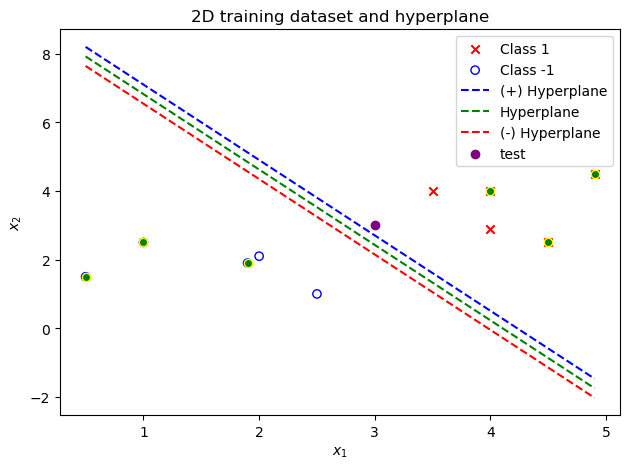

In [330]:
plot_data_2D(x, y, margin, w, b)
plt.title('2D training dataset and hyperplane')
plt.legend()
plt.tight_layout()
for i in KKT:
    plt.scatter(x1[i], x2[i], label='KKT', marker='o',edgecolors='yellow', facecolors='green')
    
plt.show()

The green points satisfy KKT.

In [331]:
class_pred_33 = d(w, b, [3,3]) #calc_h(w, [3,3], b)
print("distance [3,3] to hyperplane: ", class_pred_33, " < ", "margin: ", margin, "?" )
print("point is in margin? ", class_pred_33 < margin)

distance [3,3] to hyperplane:  0.23767191636080828  <  margin:  0.2781695722345141 ?
point is in margin?  True


Point x* = [3,3] with y* = 1, we can see that the point rests inside of the positive hyperplane (the margins) from the analytical results above, meaning it would face correct classification in class 1 despite being in the margin. The distance of [3,3] to the hyperplane is 0.2376, whereas the perpendicular margin is 0.278. The point rests just inside the positive marginal hyperplane, but appears outside of it on the graph because margins were added vertically (not perpendicularly) to the main hyperplane and the incorrect margin (vertical distance) becomes (much) greater than the distance of the point to the hyperplane, and thus the true location of the (+/-) hyperplanes should be in fact a bit more seperated. 

In [333]:
x_ = [3,3]
y_ = 1
h_ = calc_h(w, x_, b)

xi = 1 - y_*h_
print("xi: ", xi)


xi:  0.9385434400670843


Given the above calculations for the linear model using the obtained weights, the intercept, and the point itself, we found that the minimum value ξi xi could hold. We want to share the condition: 1 - y*h(x) >= ξi and in solving this inequality, we find ξi = 0.9385434400670843. However, since the point is actually correctly classified (but may have tight margins), we will note that ξi = max(0,1-y*h) actually says ξi = 0 as upon correct classification we set the slack variable to zero, and upon incorrect classification we use ξi = 1-y*h. Thus, I guess ξ should be equal to 0 upon generalizing the model to x* = [3,3].